# PCA Simulator

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from sklearn.preprocessing import StandardScaler

In [19]:
data = load_digits()  # Load MNIST data set
X_data, y_data = data.images, data.target
X_data = X_data.reshape(X_data.shape[0], -1)

explained variance for first 31 PCA:  0.9004642597586598


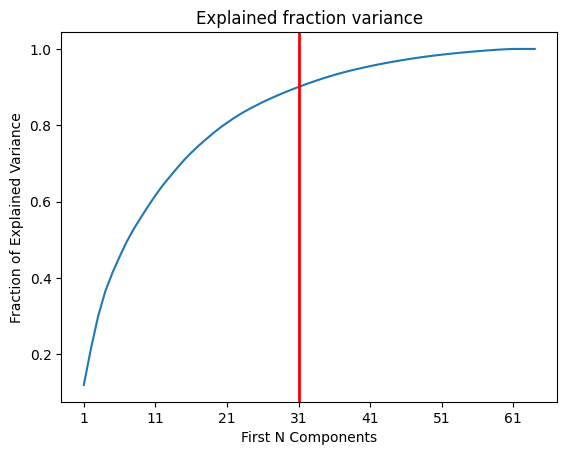

In [20]:
def PCA(X, n):
    sigma = X.T.dot(X)/X.shape[0]
    U, S, V = np.linalg.svd(sigma)
    Ureduced = U[:, :n]
    Xreduced = X.dot(Ureduced)
    return Xreduced, U, S, V
 
Xstd = StandardScaler().fit_transform(X_data)
Xreduced, U, S, V = PCA(Xstd,3)
 
percentVariance = S / S.sum()
 
xLine = 31
 
fig, ax = plt.subplots()
ax.plot(percentVariance.cumsum())
ax.set_ylabel('Fraction of Explained Variance')
ax.set_xlabel('First N Components')
_ = ax.set_title('Explained fraction variance')
_ = ax.axvline(xLine-1, color='r', linewidth=2, label=xLine)
_ = ax.set_xticks(range(0, len(percentVariance), 10))
_ = ax.set_xticklabels(range(1, len(percentVariance) + 1, 10))
print(f'explained variance for first {xLine} PCA: ', percentVariance.cumsum()[xLine-1])
 